<a href="https://colab.research.google.com/github/bartlomiejkoszek/data_analysis/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**The project was made by Bartłomiej Koszek and Bartłomiej Gniazdowski**

**Types Machine Learning:**

a) Supervised Learning

b) Unsupervised Learning


**Supervised Learning:**

a) Classification (e.g. prediction of a person has diabeties or not)

b) Regression (prediction a continuous value) - *this method is going to be used in the project*

**Dataset Used:** Boston House Price Dataset

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Dataset comes from UCI Machine Learning Repository.
There are 506 entries and 14 features of homes from Boston and its suburbs.

**Goal of the project:** Machine Learning model should predict the price.

**Metohod used:** XGBoost Regression

**Steps to be performed:**
1. Look through the dataset
2. Data pre-processing
3. Basic analysis (finding out what's the correlation between various features)
4. Split data between training data and testing data
5. Use XGBoost Regression alghoritm on training data
6. Evaluate model on testing data

In [ ]:
#Impoporting required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split #to split data to training and testing groups
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
#Importing dataset
bhpdataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Changing data type to pandas dataframe

#import feature columns with titles
bhpdataset_df = pd.DataFrame(bhpdataset.data, columns = bhpdataset.feature_names)
bhpdataset_df['price'] = bhpdataset.target #import price column

bhpdataset_df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Minimum price in 1000s USD is:  5.0  and maximum price in 1000s USD is:  50.0 .


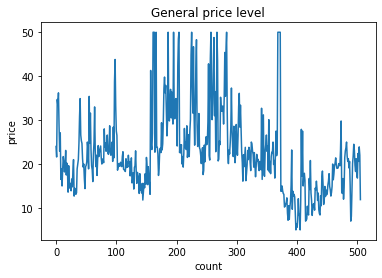

In [ ]:
#Data overview - general price level
ax = sns.lineplot(x = bhpdataset_df.index, y=bhpdataset_df["price"], ci = None)
ax.set_xlabel('count')
ax.set_title('General price level')
print('Minimum price in 1000s USD is: ', min(bhpdataset_df['price']),
      ' and maximum price in 1000s USD is: ', max(bhpdataset_df['price']),'.')

Minimum tax per 10, 000 USD is: 187.0 and maximum is: 711.0 .


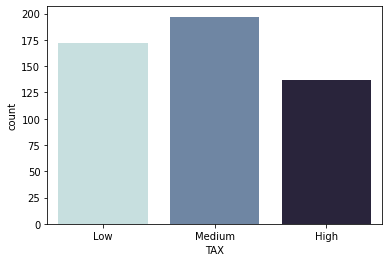

In [ ]:
#Data overwiev - tax levels
print('Minimum tax per 10, 000 USD is:',min(bhpdataset_df['TAX']),
      'and maximum is:', max(bhpdataset_df['TAX']),'.')

#function grupping tax levels
def tax_level(x):
    #x = int(x)
    if x >= 0 and x <= 300:
        return "Low"
    elif x > 300 and x <= 600:
        return "Medium"
    elif x > 600 :
        return "High"

#Number of houses with tax in specific categories
bhpdataset_df_tax = bhpdataset_df["TAX"].apply(tax_level)
bhpdataset_df_tax["TAX"] = bhpdataset_df["TAX"].apply(tax_level)

sns.countplot(x = "TAX", data = bhpdataset_df_tax, palette = "ch:start=.2,rot=-.3")

In [ ]:
#Overview of the dataset part 1
bhpdataset_df.shape

(506, 14)

In [ ]:
#Overview of the dataset part 2
bhpdataset_df.isnull().sum() #how many lacking values are there

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
#Overview of the dataset part 3
bhpdataset_df.describe() #basic statistical measures

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Correlation** - dependance between two variables

There are two types of correlation:
1. **Positive correlation** - relationship between two variables in which both variables move in the same direction.
2. **Negative correlation** - relationship between two variables in which an increase in one variable is associated with a decrease in the other.

*Now, the goal is to look for correlation betweend variables.*

In [ ]:
# Calculating correlation between variables
corr = bhpdataset_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


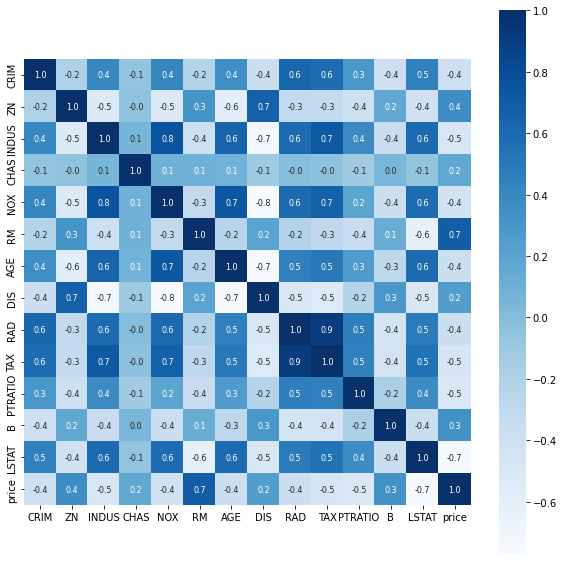

In [ ]:
#Visualisation of correlation between variables on a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True,
            annot_kws = {'size' : 8}, cmap = 'Blues')

*Correlation determinant could be a value from -1 (negative correlation) to 1 (positive correlation).*

**What's worth to point out looking on the graph above:**
- Correlation between LSTAT: (% lower status of the population) and price is -0.7 -> In areas where there is more people from lower status class, prices of houses are cheeper;
- Correlation between TAX (full-value property-tax rate per $10,000) and RAD (index of accessibility to radial highways) is 0.9 -> higher taxes led to building more highways;
- Correlation between RM (average number of rooms per dwelling) and price is 0.7 -> the more room in the house, the more expensive it is.

In [ ]:
#Now, the goal is to use Machine Learning model to see...
#...how much impact different variables have on target (price)

#Splitting the data into target (price) and other variables
X = bhpdataset_df.drop(['price'], axis = 1)
Y = bhpdataset_df['price']

In [ ]:
#Splitting data into training data and test/evaluation data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
#20% of data is going to be test data, 80% - train data

**XGBoost Regression - model implementation**

"*XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.*"

"*When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score.*" [źródło](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html)

Another useful link with simple model description:

https://towardsdatascience.com/xgboost-regression-explain-it-to-me-like-im-10-2cf324b0bbdb

In [ ]:
#Assigning model to a variable xgboost_model
xgboost_model = XGBRegressor()

#Train the model with
xgboost_model.fit(X_train, Y_train)

[02:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Model evaluation - train data**

In [ ]:
# a) predictions on training data (80% of the dataset)
train_data_prediction = xgboost_model.predict(X_train)
print(train_data_prediction) #Here are predicted prices based...
#...on training data (given in 1000 of dollars)

[23.360205  22.462858  20.84804   33.77895   15.333282  13.616525
 21.71274   15.175322  11.724756  21.836252  16.08508    7.52517
 31.094206  48.56228   32.623158  20.546066  22.177324  20.500404
 31.666502  20.551508  25.74269    8.247894  45.200817  22.069397
 20.698004  20.100042  19.873472  26.242834  23.39618   31.927258
 21.493471   9.280926  18.504272  21.87202   12.504413  10.578829
 13.054951  23.541336  19.164755  15.888303  23.768887  28.454714
 15.539753  18.049202  16.23671   14.08383   25.33273   17.575668
 49.566467  16.990675  21.738977  32.935143  16.125738  22.45393
 20.776966  20.042227  22.898897  38.124043  30.607079  32.607468
 20.919416  47.348038  14.524615   8.126455  19.581661   9.030508
 26.462107  17.69918   20.546162  46.312218  39.689137  34.387108
 22.11083   34.568977  24.873934  50.078335  14.5669775 20.525211
 20.62971   23.202105  49.514477  23.12061   24.795782  20.319666
 43.869396  17.110266  32.165016  34.75202    7.313497  20.309446
 18.038298  

In [ ]:
#Calculating error of prediction

#1) R squared error - represents the fraction of variance of the...
#...actual value of the response variable captured by the regression model
score = metrics.r2_score(Y_train, train_data_prediction)
score

0.9733349094832763

In [ ]:
#2) Mean Absolute Error - the average of all absolute errors
score2 = metrics.mean_absolute_error(Y_train, train_data_prediction)
score2

1.145314053261634

Both values are quite close to 0 so model is performing well.

**Model evaluation - test data**

In [ ]:
# a) predictions on test data (20% of dataset)
test_data_prediction = xgboost_model.predict(X_test)
print(test_data_prediction) #Here are predicted prices based on training data...
#...(given in 1000 of dollars)

[19.862686  20.875359  33.17797   27.382437   8.670393  12.749035
 24.892832  28.360075  24.255108  21.072632  26.47432   23.733467
 19.937876  20.904943  11.981489  21.96157   18.912077  11.756731
  7.6664963 15.348703  22.421118  20.452726  35.121113  18.995922
 14.649773  19.7423    46.987373  31.679413  33.486717  19.149603
 16.978365  19.986921  29.671926  25.908306  12.054155  19.783747
 11.48538   20.736174  21.28781   22.159164  24.212786  14.06105
 31.836473   8.498605  19.9131    15.15852   34.853638  16.41293
 32.33093   11.683373  29.010166  27.483522   7.4060163 36.29048
 26.685335  19.16574   18.62919   18.594267  15.957146  20.692377
 18.621147  20.87898   18.639454  31.751453  34.53461   24.462927
 48.532074  25.695988  11.561405  22.441519  13.844913   8.819357
 18.711916  17.386942  25.362583  24.995708  21.686417  21.840801
 20.210482  23.037663  34.230244  17.989033  19.622482  29.318424
 47.41502   34.988304  18.88605   23.692265  29.01938   19.878334
 20.244999  1

In [ ]:
#Calculating error of prediction

#1) R squared error - represents the fraction of variance of the actual value of the response...
#...variable captured by the regression model
score3 = metrics.r2_score(Y_test, test_data_prediction)
print(score3)

#2) Mean Absolute Error - the average of all absolute errors
score4 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print(score4)

0.9115937697657654
1.9922956859364223


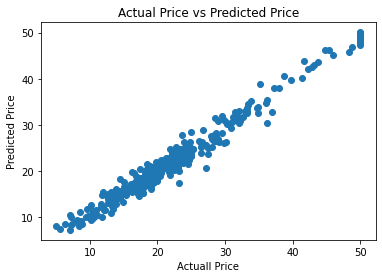

In [ ]:
#Actual Price vs Predicted Price

plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actuall Price")
plt.ylabel("Predicted Price")
plt.title('Actual Price vs Predicted Price')
plt.show()

#We can see that values are pretty close so the model is performing well.

In [ ]:
#Eksport do PDF
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('House Price Prediction.ipynb')

--2022-06-19 04:45:41--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-06-19 04:45:42 (30.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/House Price Prediction.ipynb to pdf
[NbConvertApp] Support files will be in House Price Prediction_files/
[NbConvertApp] Making directory ./House Price Prediction_files
[NbConvertApp] Making directory ./House Price Prediction_files
[NbConvertApp] Making directory ./House Price P

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'